In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Mall_Customers.csv")
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

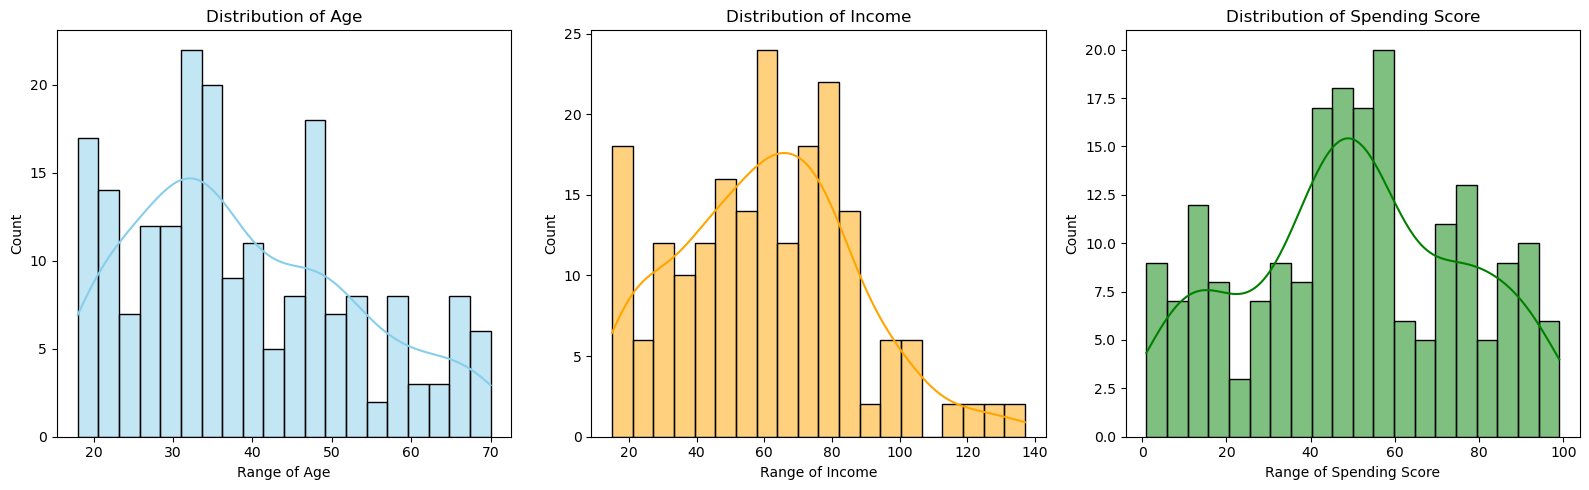

In [5]:
plt.figure(figsize=(16, 5))

# Age distribution
plt.subplot(1, 3, 1)
sns.histplot(data['Age'], kde=True, bins=20, color="skyblue")
plt.title("Distribution of Age")
plt.xlabel("Range of Age")
plt.ylabel("Count")

# Income distribution
plt.subplot(1, 3, 2)
sns.histplot(data['Annual Income (k$)'], kde=True, bins=20, color="orange")
plt.title("Distribution of Income")
plt.xlabel("Range of Income")
plt.ylabel("Count")

# Spending Score distribution
plt.subplot(1, 3, 3)
sns.histplot(data['Spending Score (1-100)'], kde=True, bins=20, color="green")
plt.title("Distribution of Spending Score")
plt.xlabel("Range of Spending Score")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


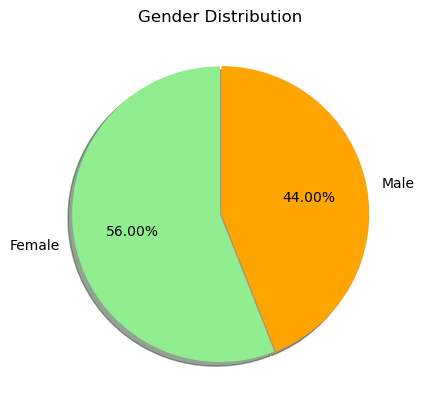

In [6]:
# Gender distribution pie chart
df = data['Gender'].value_counts()

df.plot(
    kind='pie',
    colors=['lightgreen', 'orange'],
    explode=[0, 0.01],
    autopct='%.2f%%',
    startangle=90,
    shadow=True
)

plt.title("Gender Distribution")
plt.ylabel("")  # Removes y-label
plt.show()


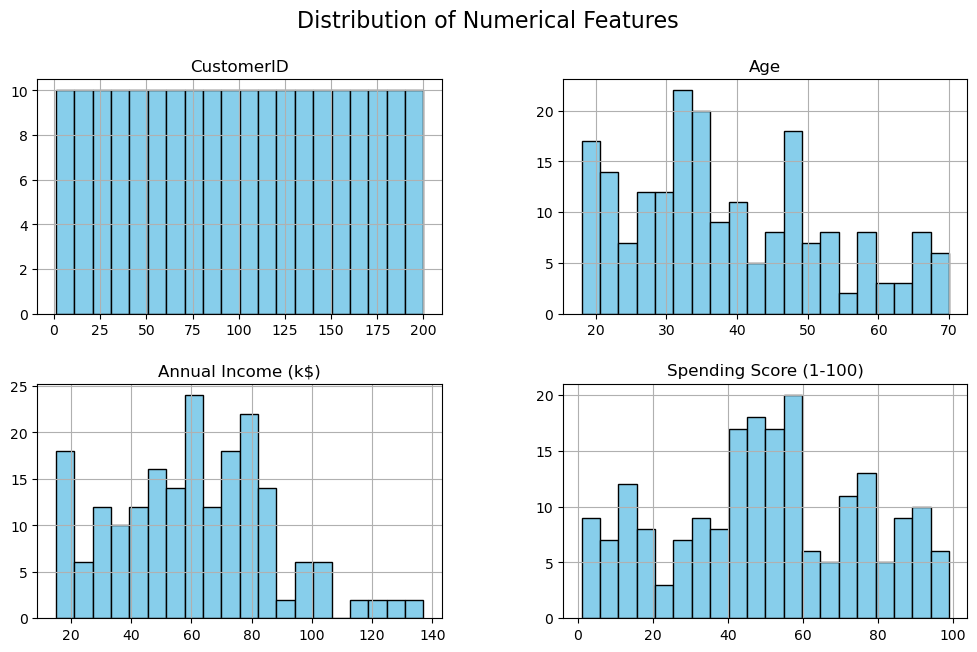

In [7]:
# Histograms of all numerical features
data.hist(figsize=(12, 7), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()


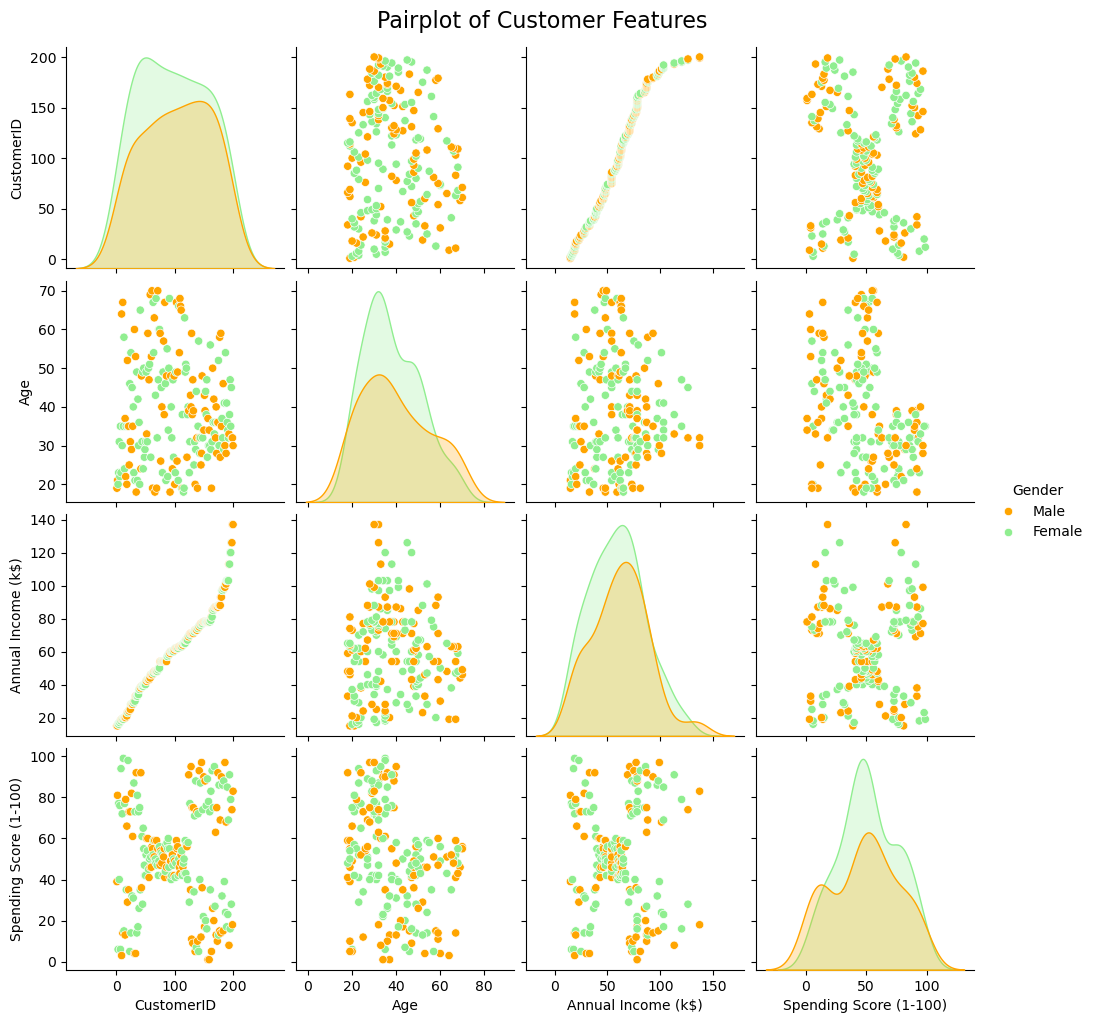

In [8]:
# Pairplot of all numerical features
sns.pairplot(data, hue="Gender", palette=["orange", "lightgreen"])
plt.suptitle("Pairplot of Customer Features", y=1.02, fontsize=16)
plt.show()


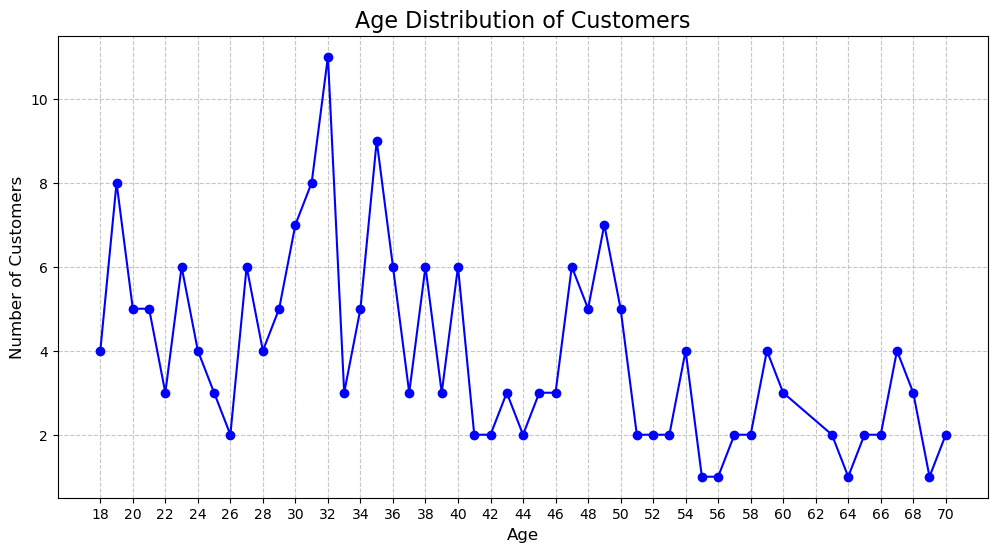

In [9]:
# Line chart of Age distribution
age_counts = data['Age'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(age_counts.index, age_counts.values, marker='o', linestyle='-', color='blue')
plt.title("Age Distribution of Customers", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(range(min(age_counts.index), max(age_counts.index)+1, 2))  # Show age ticks every 2 years
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


In [10]:
data['Gender'].replace({'Male':0 , 'Female':1})

C:\Users\chara\AppData\Local\Temp\ipykernel_14716\114066328.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'].replace({'Male':0 , 'Female':1})


0      0
1      0
2      1
3      1
4      1
      ..
195    1
196    1
197    0
198    0
199    0
Name: Gender, Length: 200, dtype: int64

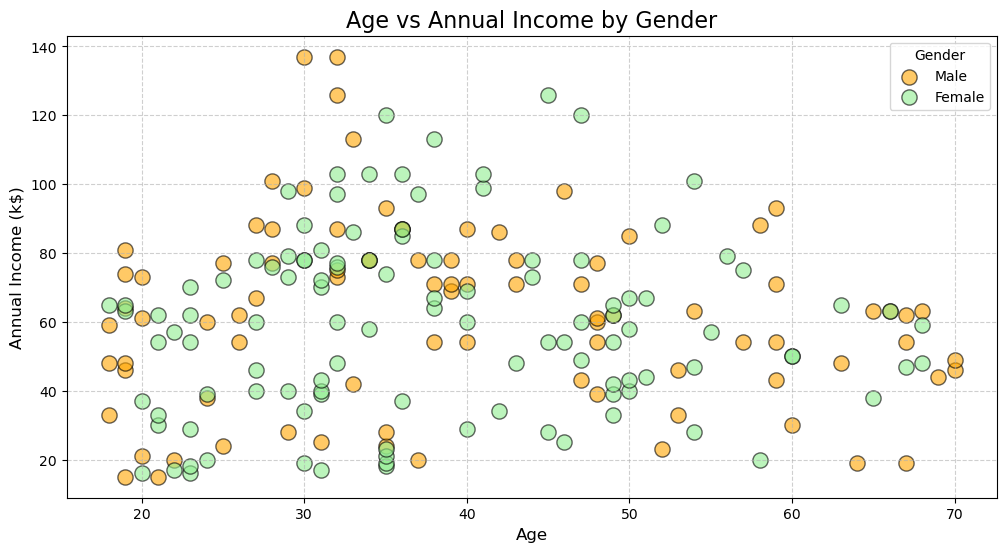

In [11]:
# Scatter plot of Age vs Annual Income by Gender
plt.figure(figsize=(12, 6))

for gender, color in zip(['Male', 'Female'], ['orange', 'lightgreen']):
    plt.scatter(
        x='Age',
        y='Annual Income (k$)',
        data=data[data['Gender'] == gender],
        s=120, alpha=0.6, label=gender, color=color, edgecolor='black'
    )

plt.xlabel("Age", fontsize=12)
plt.ylabel("Annual Income (k$)", fontsize=12)
plt.title("Age vs Annual Income by Gender", fontsize=16)
plt.legend(title="Gender")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


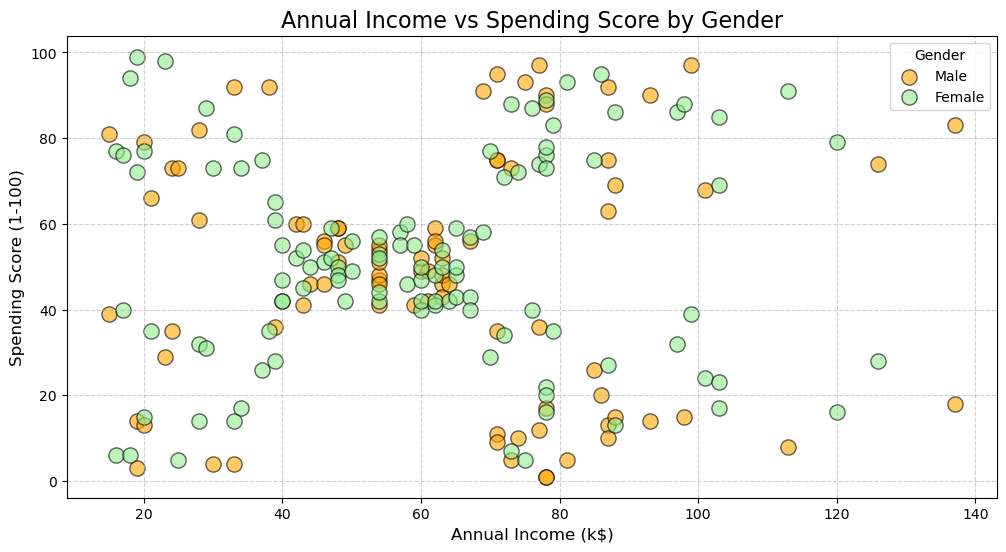

In [12]:
# Scatter plot of Annual Income vs Spending Score by Gender
plt.figure(figsize=(12, 6))

for gender, color in zip(['Male', 'Female'], ['orange', 'lightgreen']):
    plt.scatter(
        x='Annual Income (k$)',
        y='Spending Score (1-100)',
        data=data[data['Gender'] == gender],
        s=120, alpha=0.6, label=gender, color=color, edgecolor='black'
    )

plt.xlabel("Annual Income (k$)", fontsize=12)
plt.ylabel("Spending Score (1-100)", fontsize=12)
plt.title("Annual Income vs Spending Score by Gender", fontsize=16)
plt.legend(title="Gender")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [13]:
X = data.iloc[:, [3,4]].values

In [14]:
from sklearn.cluster import KMeans

In [19]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


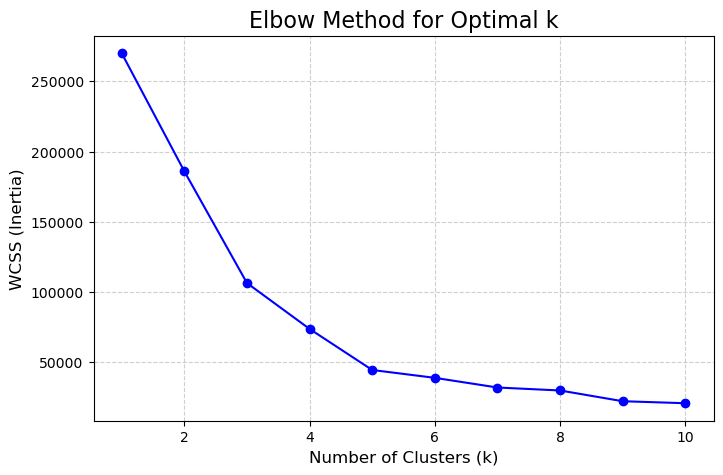

In [20]:

# Elbow method to find optimal k
k = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    k.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), k, marker='o', linestyle='-', color='blue')
plt.title("Elbow Method for Optimal k", fontsize=16)
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("WCSS (Inertia)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [21]:
model = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
kmeans.fit(X)
y_kemsn = model.fit_predict(X)
y_kmeans = model.fit_predict(X)

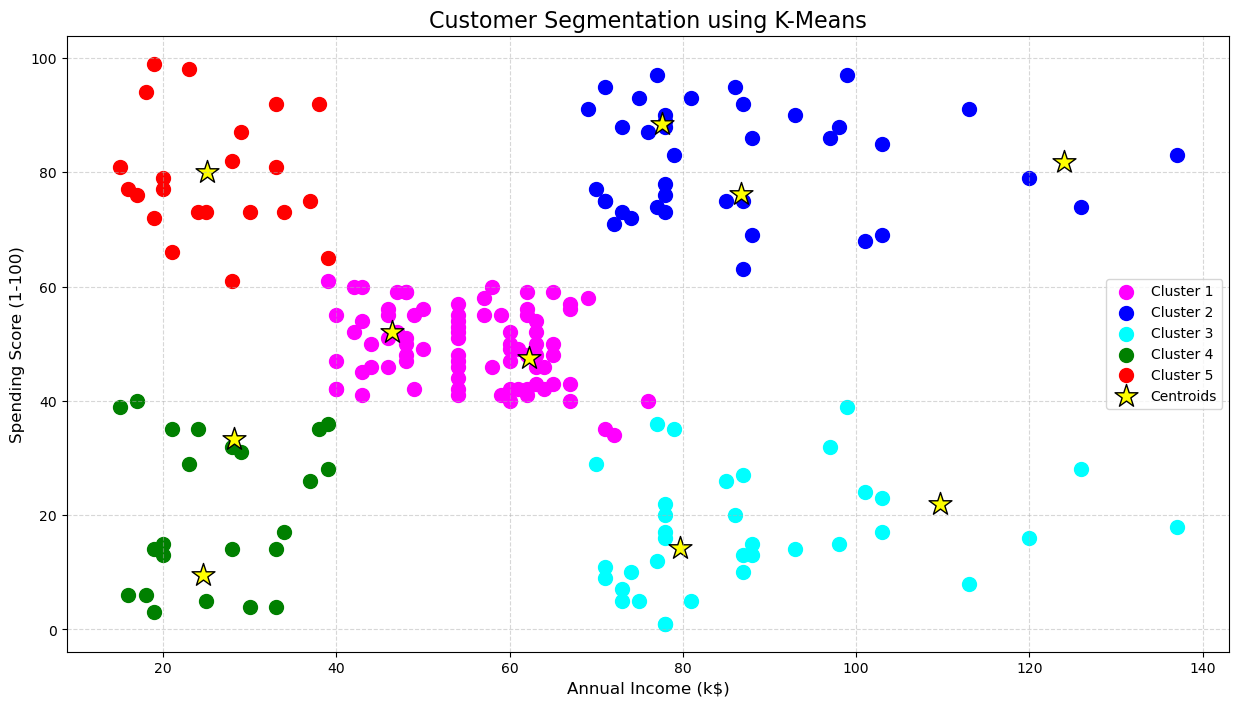

In [25]:
# Visualizing the clusters
plt.figure(figsize=(15, 8))

# Plot each cluster
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s=100, c='magenta', label='Cluster 1')

plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s=100, c='blue', label='Cluster 2')

plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], 
            s=100, c='cyan', label='Cluster 3')

plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], 
            s=100, c='green', label='Cluster 4')

plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], 
            s=100, c='red', label='Cluster 5')

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='yellow', edgecolor='black', marker='*', label='Centroids')

plt.title("Customer Segmentation using K-Means", fontsize=16)
plt.xlabel("Annual Income (k$)", fontsize=12)
plt.ylabel("Spending Score (1-100)", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [24]:
data['Cluster'] = y_kmeans
cluster_summary = data.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_summary)


         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 88.200000               17.114286
3                 26.304348               20.913043
4                 25.727273               79.363636
